# Simulation of Heat Controller use case with CoFMPy

In [1]:
%reload_ext autoreload
%autoreload 2

from cofmpy.coordinator import Coordinator

In [2]:
coordinator = Coordinator()

fsolve_kwargs = {
    "solver": "fsolve",
    "time_step": 0.1,
}

coordinator.start(
    conf_path="config.json",
    fixed_point_init=False,
    fixed_point_kwargs=fsolve_kwargs,
)

Skipping Fixed Point Initialization


In [3]:
print("Initial input dict:")
coordinator.master._input_dict

Initial input dict:


{'heater': {'P_in': [0]}, 'controller': {'Tc': [24], 'T_in': [0]}}

In [ ]:
coordinator.graph_engine.plot_graph()

## Run co-simulation

We run the use case as follows:

- 300 steps with setpoint Tc = 24 (temperature at t=0 is 17°C)
- 300 steps with setpoint Tc = 22
- 300 steps with setpoint Tc = 26

The time step is set to 0.1.

In [5]:
from tqdm import tqdm

communication_time_step = 0.1

N = 300  # Run N steps
for _ in tqdm(range(N)):
    coordinator.do_step(communication_time_step)

coordinator.master.set_inputs({"controller": {"Tc": [22.0]}})

N = 300  # Run N steps with new setpoint temperature
for _ in tqdm(range(N)):
    coordinator.do_step(communication_time_step)

coordinator.master.set_inputs({"controller": {"Tc": [26.0]}})

N = 300  # Run N steps with new setpoint temperature
for _ in tqdm(range(N)):
    coordinator.do_step(communication_time_step)

results = coordinator.master.get_results()

100%|██████████| 300/300 [00:00<00:00, 19049.43it/s]


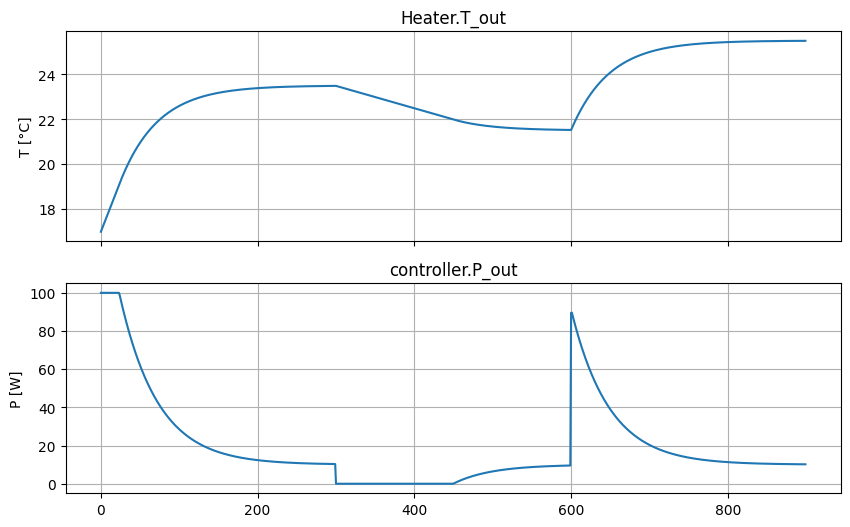

In [6]:
# Plot the results
import matplotlib.pyplot as plt


fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(results[("heater", "T_out")])
axs[0].set_ylabel("T [°C]")
axs[0].set_title("Heater.T_out")
axs[0].grid()

axs[1].plot(results[("controller", "P_out")])
axs[1].set_ylabel("P [W]")
axs[1].set_title("controller.P_out")
axs[1].grid()